<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/price_House_linear_model_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALIFORNIA HOUSE PRICES 

##Linear regression vs XGBoost 



#DESCRIPTION DATA
1. **Longitude**: A measure of how far west a house is; a higher value is farther west

2. **Latitude**: A measure of how far north a house is; a higher value is farther north

3. **HousingMedianAge:** Median age of a house within a block; a lower number is a newer building

4. **totalRooms:** Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncom**e: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea



In [ ]:
# to make the maps
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 15.4 MB 102 kB/s 
     |████████████████████████████████| 6.3 MB 29.7 MB/s 


In [ ]:
# coordinates of all countries 
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d camnugent/california-housing-prices

Saving kaggle.json to kaggle.json
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 26.5MB/s]


In [ ]:
!unzip /content/california-housing-prices.zip
import pandas as pd
datos=pd.read_csv('/content/housing.csv')


Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


In [ ]:
datos.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

From the distribution function of the mean in prices, the existence of outliers in prices can be seen. Therefore, in the regression you can choose (if the data are real and not errors):

-**remove**

-**replace**

-**Leave them and work them like this**

`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


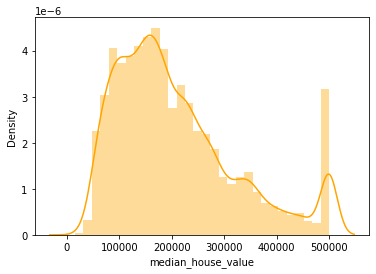

In [ ]:
sns.distplot(datos['median_house_value'], bins=30, color="Orange")
plt.show()

**In the correlation analysis** you can see the existence of a weak and strong correlation between some of the variables.


**Observation:** the existence of outliers may not reflect the real correlation between the variables. 

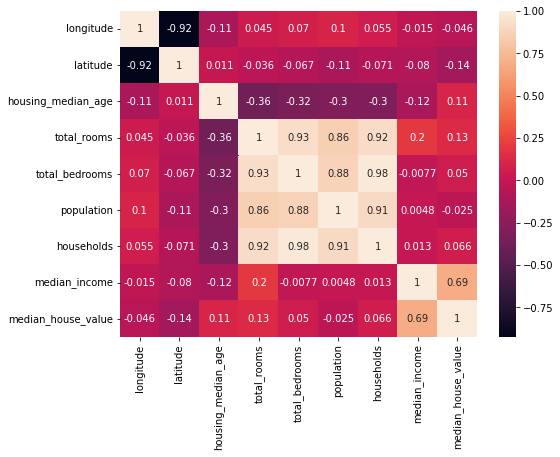

In [ ]:
#See correlation between variables
corr_df = datos.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


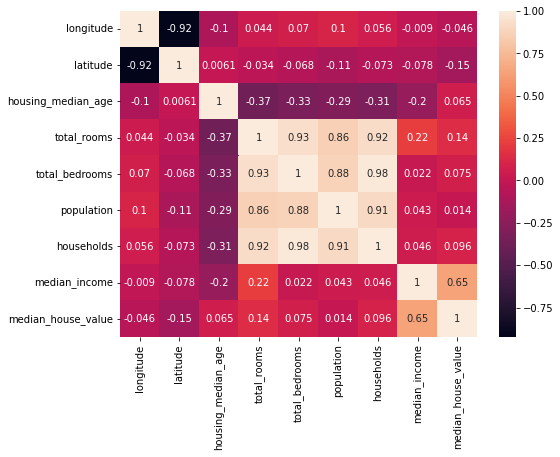

In [ ]:
#correlation without outliers 
data_sin_va=datos[datos.median_house_value<500000]
corr_df = data_sin_va.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


In [ ]:
#check for missing values 
datos.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Case: remove outliers 
## Linear regression vs XGBoost


In [ ]:
y=data_sin_va.median_house_value
X=data_sin_va.drop(['median_house_value'], axis=1)
#if you want to perform the regression considering the outliers 
#y=datos.median_house_value
#X=datos.drop(['median_house_value'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state=0)

In [ ]:
#IMPUTATION OF MISSING VALUES 
X_train=X_train.fillna(X_train.mean())
X_test=X_test.fillna(X_test.mean())


In [ ]:
#TRANSFORMACIÓNDE LA VARIABLE CATEGORICA
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test= X_test.copy()

feature_categorical=['ocean_proximity']
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train['ocean_proximity'] = ordinal_encoder.fit_transform(X_train[feature_categorical])
label_X_test['ocean_proximity'] = ordinal_encoder.transform(X_test[feature_categorical])

label_X_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4481,-118.18,34.06,27.0,2025.0,565.0,2189.0,577.0,2.6083,0.0
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,3.0


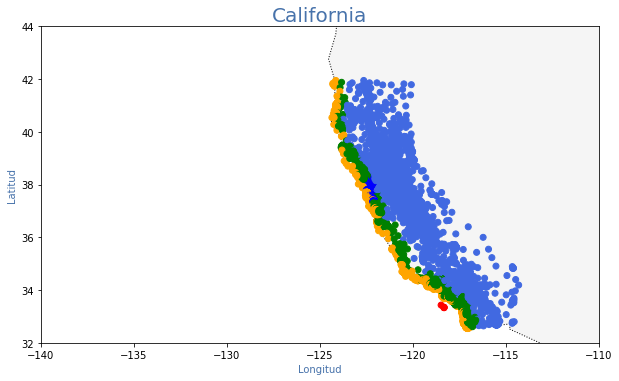

In [ ]:
#OBTENER COORDENADAS DE USA
Usa=world[world.name=='United States of America']
colores={'NEAR BAY':"blue",'<1H OCEAN':"green",'INLAND':"RoyalBlue",'NEAR OCEAN':"Orange",'ISLAND':"red"}
clase_colores=datos.ocean_proximity.map(colores)

#dibujar mapa con todas las coordenadas
ax = Usa.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
#fijar rango de ventana
ax.axis([-140, -110, 32, 44])

ax.scatter(x=datos.longitude,
           y=datos.latitude,
           color=clase_colores)

# Control del título y los ejes
ax.set_title('California', pad =5,fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud',fontdict={'fontsize':10, 'color': '#4873ab'})
ax.set_ylabel('Latitud',fontdict={'fontsize':10, 'color': '#4873ab'} )
plt.show()

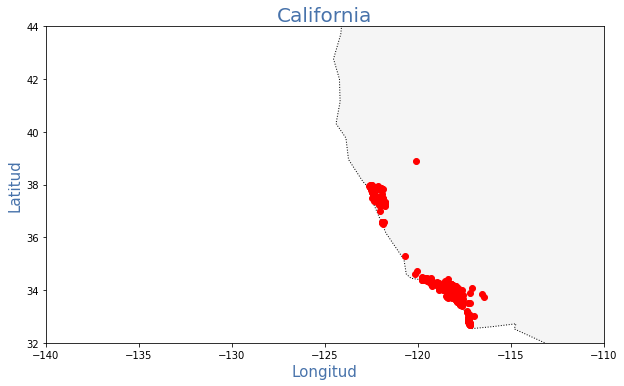

proportion: 0.04806


In [ ]:
#SEE LOCATION OF THE ATYPICAL VALUES 
sub=datos[datos['median_house_value']>=500000]
Usa=world[world.name=='United States of America']
ax = Usa.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
ax.axis([-140, -110, 32, 44])

ax.scatter(x=sub.longitude,
           y=sub.latitude,
           color="red")
# Control del título y los ejes
ax.set_title('California', pad =5,fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud',fontdict={'fontsize':15, 'color': '#4873ab'})
ax.set_ylabel('Latitud',fontdict={'fontsize':15, 'color': '#4873ab'} )
plt.show()
print("proportion: %0.5f" %(sub.shape[0]/datos.shape[0]))

In [ ]:
# Multiple linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

modelo =make_pipeline(StandardScaler(with_mean=True), LinearRegression()) 
modelo.fit(X =label_X_train, y = y_train)
prediccion=modelo.predict(label_X_test)
# Metrics 
print('r^2: %0.3f'  % modelo.score(label_X_test,y_test))
print('RMSE: %0.3f'  % np.sqrt(mean_squared_error(prediccion,y_test)))


r^2: 0.599
RMSE: 62118.257


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE 

xgb_r = xgb.XGBRegressor(objective ='reg:linear',  n_estimators =8,max_depth=6,learning_rate=0.5, seed = 123)   
xgb_r.fit(label_X_train, y_train)   
pred = xgb_r.predict(label_X_test)   


[23:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
r2=xgb_r.score(label_X_test,y_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : %0.3f" %(rmse)) 
print("R2:    %0.3f " %(r2))

RMSE : 49203.965
R2:    0.748 


**In this case we obtain a model with greater predictive capacity using the XGBoost model.**